Esta é uma folha de revisões em que para além de resolver os exercícios vai explicar os resultados obtidos.

In [1]:
#Carregue o seguinte dataset a partir do github (pode aproveitar para criar uma conta no github)
#endereço: https://raw.githubusercontent.com/atrigo/mlExp/master/winequality/winequality-red.csv
#para um pandas dataframe e mostre as cinco primeiras linhas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# ficheiro cvs
csv_file = "https://raw.githubusercontent.com/atrigo/mlExp/master/winequality/winequality-red.csv"

#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# cvs para dataframe
data_vinho = pd.read_csv(csv_file)

print(data_vinho)

# 1ªs 5 linhas dataframe
print(data_vinho.head())



      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [ ]:
#Veja as dimensões do dataset e corra o método describe para verifique se existem
#valores em falta (missing values) em alguma coluna

print(data_vinho.shape)
data_vinho.describe
print(data_vinho.isnull().sum())

(1599, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Identifique as variáveis das características (features) e os rótulos (labels ou targets)
#Comente os valores dos targets
X = data_vinho.drop('quality', axis = 1).values
y = data_vinho['quality'].values.reshape(-1,1)
print(X)
print("Targets")
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
Targets
[[5]
 [5]
 [5]
 ...
 [6]
 [5]
 [6]]


In [ ]:
#Utilizando a função abaixo para desenhar gráficos comente o impacto visual das diferentes
#caracterísitcas na qualidade do vinho - deverá apresentar tantos gráficos quantas as features
#vai precisar de importar a bilbioteca (package) seaborn

import seaborn as sns
sns.barplot(x= "quality", y= "fixed acidity", data = data_vinho)

#Features: fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide, total sulfur dioxide,density,pH,sulphates,alcohol,quality



NameError: ignored

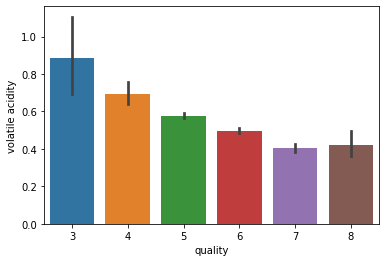

In [ ]:
sns.barplot(x= "quality", y= "volatile acidity", data = data_vinho)

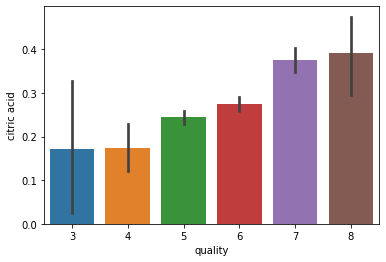

In [ ]:
sns.barplot(x= "quality", y= "citric acid", data = data_vinho)

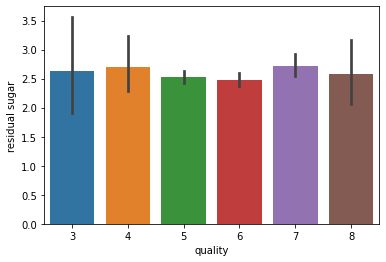

In [ ]:
sns.barplot(x= "quality", y= "residual sugar", data = data_vinho)

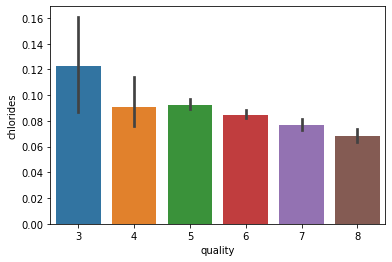

In [ ]:
sns.barplot(x= "quality", y= "chlorides", data = data_vinho)

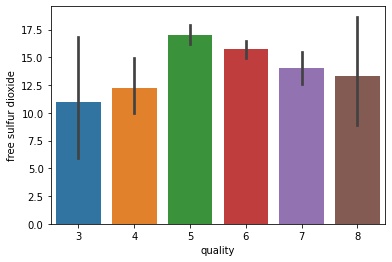

In [ ]:
sns.barplot(x= "quality", y= "free sulfur dioxide", data = data_vinho)

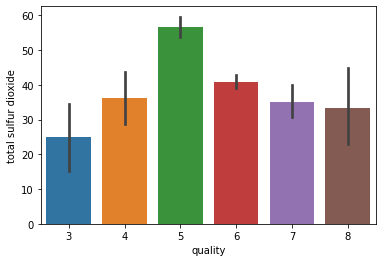

In [ ]:
sns.barplot(x= "quality", y= "total sulfur dioxide", data = data_vinho)

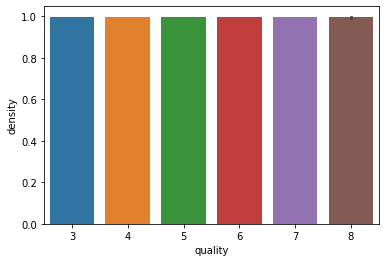

In [ ]:
sns.barplot(x= "quality", y= "density", data = data_vinho)

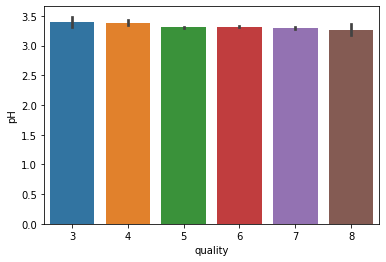

In [ ]:
sns.barplot(x= "quality", y= "pH", data = data_vinho)

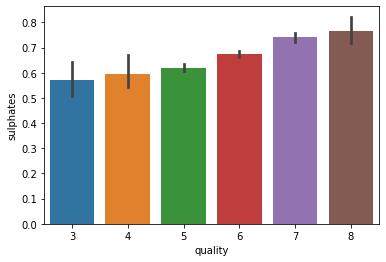

In [ ]:
sns.barplot(x= "quality", y= "sulphates", data = data_vinho)

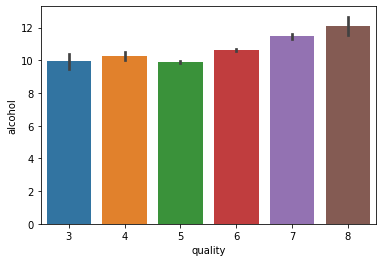

In [ ]:
sns.barplot(x= "quality", y= "alcohol", data = data_vinho)

In [ ]:
#Crie dois datasets distintos, uma para as features e outro para o target

# Separar as caracterisitcas/features(x) dos rotulos/targets(y)
X = data_vinho[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = data_vinho['quality']

print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [ ]:
#Divida os datasets anteriores em datasets de treino e teste, utilizando uma função do Python
#O conjunto de teste deve ter 25% dos dados

from sklearn.model_selection import train_test_split


train, test = train_test_split(data_vinho, test_size=0.25)
train1=pd.DataFrame(train)
test1=pd.DataFrame(test)

train1_X = data_vinho[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
train1_y = data_vinho['quality']
test1_X = data_vinho[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
test1_y = data_vinho['quality']

In [ ]:
#Defina um modelo de regressão linear, à semelhança do que fez em exercícios anteriores
#e treine o modelo
#X = data_vinho[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
#              'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
#y = data_vinho['quality']

regr = linear_model.LinearRegression()
regr.fit(train1_X, train1_y)
y_pred = regr.predict(test1_X)

In [ ]:
#Apresente os coeficentes do modelo e comente-os


print('Coefficients: \n', regr.coef_)
print('MSE: %.2f' % mean_squared_error(df1_y_test, y_pred))

Coefficients: 
 [[ 4.14820258e-02 -5.82872084e-02 -1.07092283e-01  1.75427303e-02
  -1.17679314e-01  1.50547139e-03 -4.31952669e-04 -5.58022969e+01
   9.71794418e-02  8.00202920e-02 -5.20048589e-02]]
MSE: 0.65


In [ ]:
#Utilize o conjunto de teste para prever os dados e apresente um gráfico (scatter) 
#que compare os dados que obteve com os reais e comente
import matplotlib.pyplot as plt
import pandas as pd


plt.title("Features vs Target (teste (real) e previsto (azul))")
plt.scatter(test1["alcohol"], df1_y_test,  color='black')
plt.plot(test1, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("Feature - Fixed Acidity")
plt.ylabel("Target")
plt.show()

# Outputs 2 - previsao vs real
plt.title("Valores de teste previsto vs real")
plt.scatter(df1_y_test, y_pred,  color='black')
plt.xticks(())
plt.yticks(())
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.show()

In [ ]:
#Apresente o valor de R2 e comente
print('R2: %.2f' % r2_score(df1_y_test, y_pred))


R2: -0.02


In [ ]:
#Utilizando o mesmo dataset crie um modelo, utilizando árvores de decisão
#Pode utilizar os conjuntos de treino e de teste anteriormente definidos

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(train1, df1_y_train)
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(train1, df1_y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(test1, df1_y_test)))

y_pred = decision_tree.predict(test1)

The accuracy of the Decision Tree classifier on training data is 0.92
The accuracy of the Decision Tree classifier on test data is 0.38


In [ ]:
#Utilize a função score para testar a precisão (accuracy) do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Acc: ",accuracy_score(df1_y_test, y_pred))
print("Precision: ", precision_score(df1_y_test, y_pred, average='macro'))
print("Recall: ", recall_score(df1_y_test, y_pred, average='macro'))
print("F1 Score: ", f1_score(df1_y_test, y_pred, average='macro'))



Acc:  0.35
Precision:  0.15685885065066718
Recall:  0.15868317825214376
F1 Score:  0.15745202985117032


In [ ]:
#Utilize o conjunto de teste para prever o modelo e apresente os cinco primeiros 
#registos da previsão e dos valores reais e compare para ver os resultados





In [ ]:
#Utilizando a função classification_report apresente as diferentes métricas do modelo construído
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(train1, df1_y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(train1, df1_y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(test1, df1_y_test)))

import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(train1, df1_y_train)

print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_clf.score(train1, df1_y_train)))
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_clf.score(test1, df1_y_test)))

The accuracy of the SVM classifier on training data is 0.67
The accuracy of the SVM classifier on test data is 0.44
The accuracy of the XGBoost classifier on training data is 0.67
The accuracy of the XGBoost classifier on test data is 0.41


[[ 0  1  2  1  1  0]
 [ 0  1  9  6  2  0]
 [ 2  9 67 77 12  1]
 [ 1  7 76 69 19  3]
 [ 0  1  9 16  3  0]
 [ 0  1  0  3  1  0]]


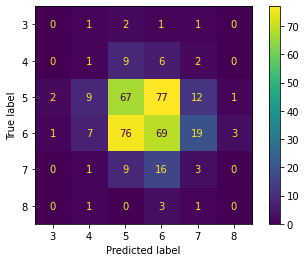

In [ ]:
#Apresente a matriz de confusão (confusion_matrix) do modelo e comente so valores
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df1_y_test, y_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_tree, test1, df1_y_test)
import matplotlib.pyplot as plt
plt.show()



Se tiver tempo pode testar este dataset com outros modelos de classificação, como:

*   Naive Bayes
*   Random Forests
*   SVM

E avaliar a precisão dos mesmos, para escolher o melhor (com maior precisão (accuracy)) para este data set.

Para a semana vamos falar de redes neuronais e depois de Deep Learning (que é o que eu penso que vai utilizar para o seu
trabalho, mas ainda não comecei a estudar o mesmo).

Bom trabalho!